# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

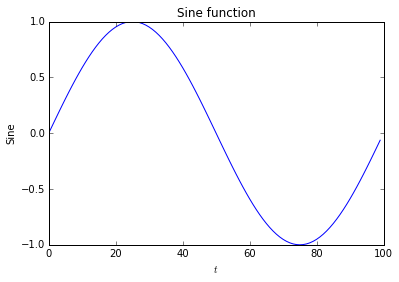

In [3]:
freq = 1
t = np.arange(0, 1, 0.01)
s = np.sin(2.*np.pi*freq*t)

plt.plot(s)
plt.xlabel(r'$t$')
plt.ylabel('Sine')
plt.title('Continuous Sine function')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

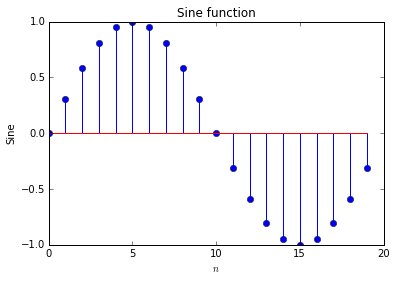

In [4]:

n = np.arange(0, 20, 1)
s = np.sin(0.1*np.pi*n)

plt.stem(s)
plt.xlabel(r'$n$')
plt.ylabel('Sine')
plt.title('Discrete Sine function')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

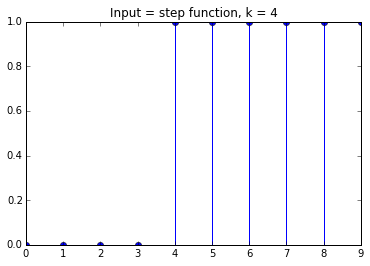

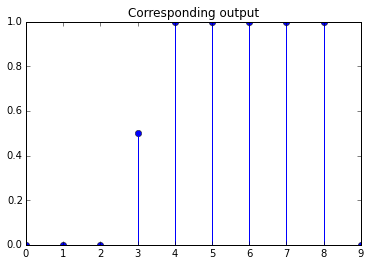

In [66]:
k = 4
N = 10
s = np.zeros((N, ))
s[k:N] = 1
plt.figure
plt.stem(s)
plt.title('Input = step function, k = 4')
plt.show()

y = np.zeros((N,))
for i in range(0, N-1):
    y[i] = (s[i] + s[i+1])/2

plt.figure
plt.stem(y)
plt.title('Corresponding output: noncausal')
plt.show()

**1.2** Propose a modification to obtain a causal version

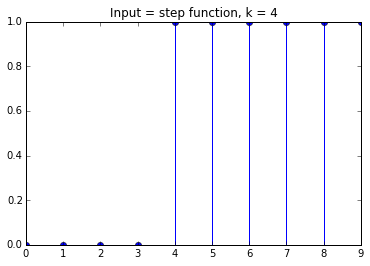

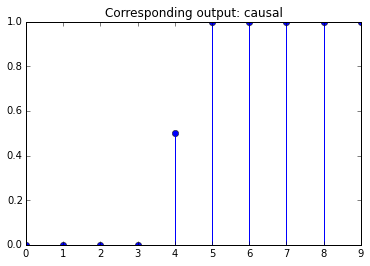

In [67]:
s = np.zeros((N, ))
s[k:N] = 1
plt.figure
plt.stem(s)
plt.title('Input = step function, k = 4')
plt.show()

y = np.zeros((N,))
for i in range(1, N):
    y[i] = (s[i-1] + s[i])/2

plt.figure
plt.stem(y)
plt.title('Corresponding output: causal')
plt.show()

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [68]:
def prim(f): 

    
    Fk = np.zeros((N,))
    for i in range (1, N):
        #Fk[i] = Fk[i] + f[i]
        f[i] = f[i] + f[i-1]
    Fk = f   
    return Fk


**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

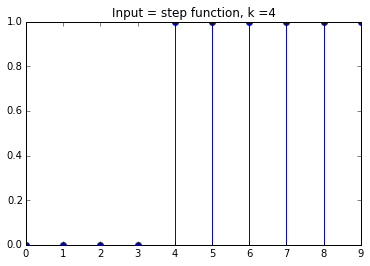

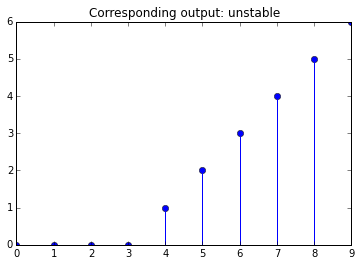

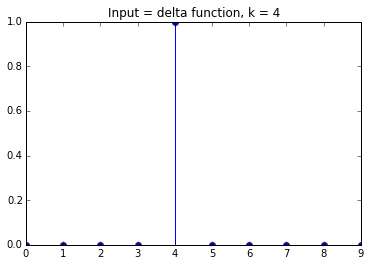

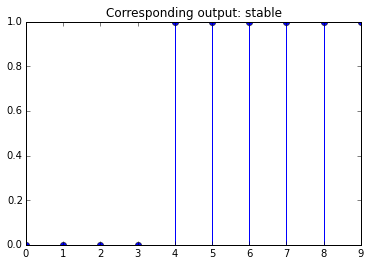

In [70]:
s = np.zeros((N, ))
s[k:N] = 1
plt.figure
plt.stem(s)
plt.title('Input = step function, k =4')
plt.show()

Fk = prim(s)
plt.figure
plt.stem(Fk)
plt.title('Corresponding output: unstable')
plt.show()

delta = np.zeros((N, ))
delta[k] = 1
plt.figure
plt.stem(delta)
plt.title('Input = delta function, k = 4')
plt.show()

Fkd = prim(delta)
plt.figure
plt.stem(Fkd)
plt.title('Corresponding output: stable')
plt.show()


**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

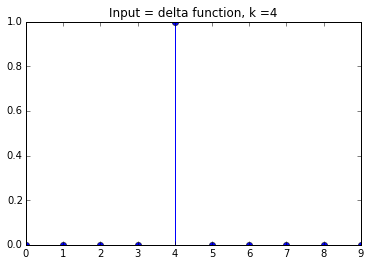

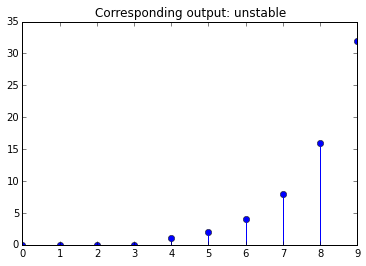

In [73]:
delta = np.zeros((N, ))
delta[k] = 1
plt.figure
plt.stem(delta)
plt.title('Input = delta function, k =4')
plt.show()

s = delta

y = np.zeros((N,))
for i in range(1, N):
    y[i] = (s[i] + 2*y[i-1])
    
plt.figure
plt.stem(y)
plt.title('Corresponding output: unstable')
plt.show()


**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

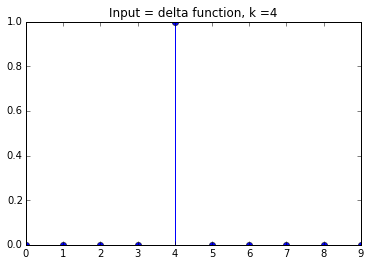

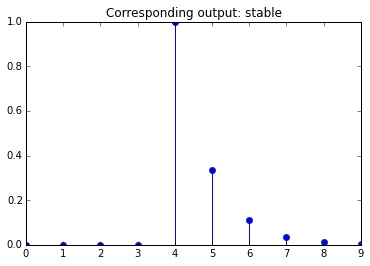

In [74]:
delta = np.zeros((N, ))
delta[k] = 1
plt.figure
plt.stem(delta)
plt.title('Input = delta function, k =4')
plt.show()

s = delta

y = np.zeros((N,))
for i in range(1, N):
    y[i] = (s[i] + y[i-1]/3)
    
plt.figure
plt.stem(y)
plt.title('Corresponding output: stable')
plt.show()


Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


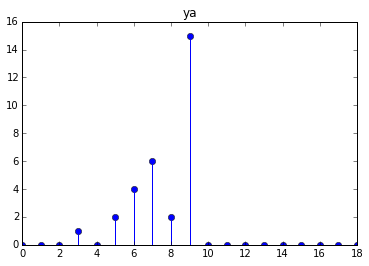

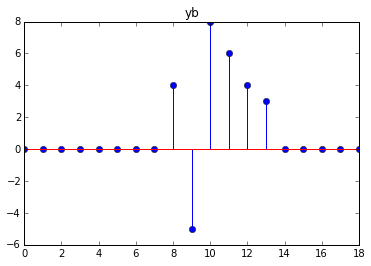

In [49]:
N = 19

xa = np.array([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
xb = np.array([0,0,0,0,0,0,0,0,0,4,3,2,1,0,0,0,0,0,0])

ya = np.array(np.zeros((N,)))
for i in range(0, 18):
    ya[i] = (3*xa[i-1] - 2*xa[i] + xa[i+1])
    
plt.figure
plt.stem(ya)
plt.title('ya')
plt.show()

    
yb = np.array(np.zeros((N,)))
for i in range(0, 18):
    yb[i] = (3*xb[i-1] - 2*xb[i] + xb[i+1])
    
plt.figure
plt.stem(yb)
plt.title('yb')
plt.show()




**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


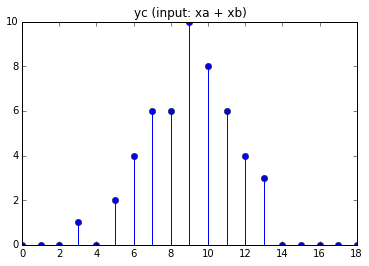

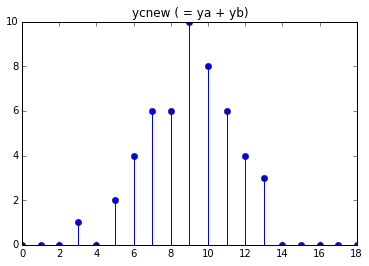

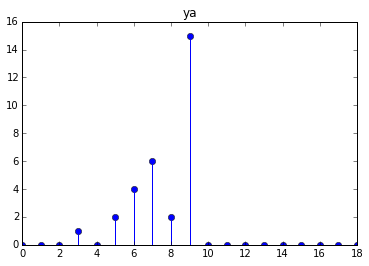

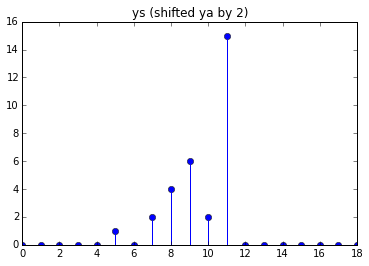

In [47]:
xc = np.array(np.zeros((N,)))
yc = np.array(np.zeros((N,)))
ycnew = np.array(np.zeros((N,)))

#Making xa and xb scaled by 1, and then perform addition
xc = xa + xb

#Compare the resulted xa + xb, and check if it is identical to ya + yb
for i in range(0, 18):
    yc[i] = (3*xc[i-1] - 2*xc[i] + xc[i+1])
plt.figure
plt.stem(yc)
plt.title('yc (input: xa + xb)')
plt.show()

for i in range(0, 18):
    ycnew[i] = ya[i] + yb[i]
plt.figure
plt.stem(ycnew)
plt.title('ycnew ( = ya + yb)')
plt.show()
#ycnew = ya + yb indeed is equalvalent to xa + xb; thus the system is a LINEAR system

#shifted xa by 2, call it xs
xs = np.array([0, 0, 0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0])

#shifted input leads to shifted output; this means the system is time-invariant
ys = np.array(np.zeros((N,)))
for i in range(0, 18):
    ys[i] = (3*xs[i-1] - 2*xs[i] + xs[i+1])

plt.figure
plt.stem(ya)
plt.title('ya')
plt.show()   

plt.figure
plt.stem(ys)
plt.title('ys (shifted ya by 2)')
plt.show()


**3.3** Propose a nonlinear/noninvariant system.

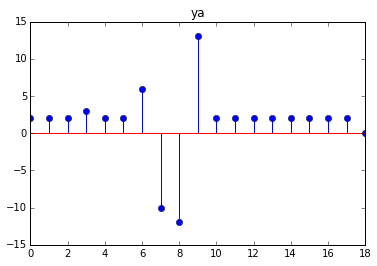

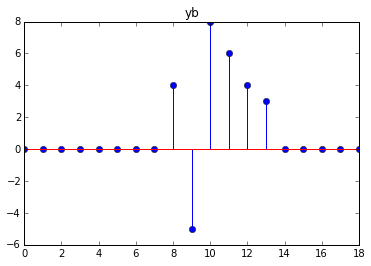

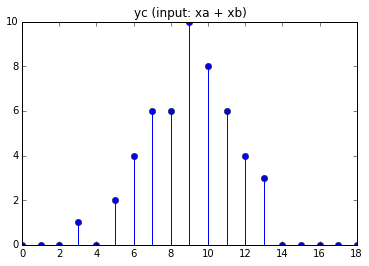

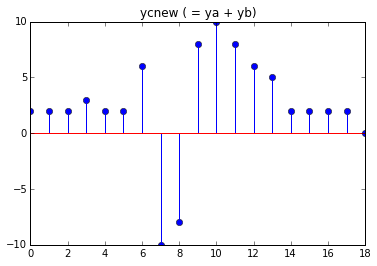

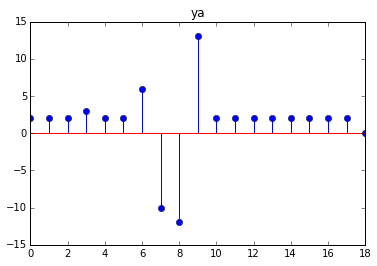

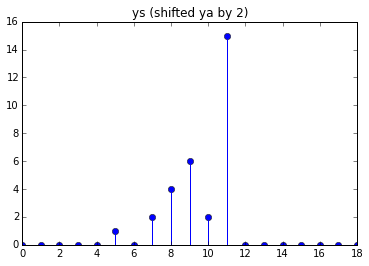

In [63]:
xa = np.array([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
    
ya = np.array(np.zeros((N,)))
for i in range(0, 18):
    ya[i] = (3*xa[i-1]^2 - 2*xa[i] + xa[i+1])
    
plt.figure
plt.stem(ya)
plt.title('ya')
plt.show()

xb = np.array([0,0,0,0,0,0,0,0,0,4,3,2,1,0,0,0,0,0,0])
yb = np.array(np.zeros((N,)))
for i in range(0, 18):
    yb[i] = (3*xb[i-1] - 2*xb[i] + xb[i+1])
plt.figure
plt.stem(yb)
plt.title('yb')
plt.show()

xc = np.array(np.zeros((N,)))
yc = np.array(np.zeros((N,)))
ycnew = np.array(np.zeros((N,)))

#Making xa and xb scaled by 1, and then perform addition
xc = xa + xb

#Compare the resulted xa + xb, and check if it is identical to ya + yb
for i in range(0, 18):
    yc[i] = (3*xc[i-1] - 2*xc[i] + xc[i+1])
plt.figure
plt.stem(yc)
plt.title('yc (input: xa + xb)')
plt.show()

for i in range(0, 18):
    ycnew[i] = ya[i] + yb[i]
plt.figure
plt.stem(ycnew)
plt.title('ycnew ( = ya + yb)')
plt.show()
#ycnew = ya + yb is not equalvalent to xa + xb; thus the system is not a LINEAR system

#shifted xa by 2, call it xs
xs = np.array([0, 0, 0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0])

#shifted input leads to shifted output; this means the system is time-invariant
ys = np.array(np.zeros((N,)))
for i in range(0, 18):
    ys[i] = (3*xs[i-1] - 2*xs[i] + xs[i+1])

plt.figure
plt.stem(ya)
plt.title('ya')
plt.show()   

plt.figure
plt.stem(ys)
plt.title('ys (shifted ya by 2)')
plt.show()